# Patch Duration vs. Morphological Calls(63x) per Post Patch Outcomes

##### Date: 4/03/18 Updated 63x.csv, shiny.csv & patch_seq_log_mouse.csv

In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

from IPython.display import display #Found this to display all columns in a table

sns.set_style('whitegrid') #Makes a white backround with gray horizontal gridmarks at y-values
sns.set_context('notebook')

##### postpatch_func.py by Rusty from Stash 

In [2]:
def nucleated(x):
    nuc_high_seal = x[(x['anno.postPatch_label'] == 'Nucleated') | 
                      (((x['anno.postPatch_label'] == 'nucleus_visible') | 
                      (x['anno.postPatch_label'] == 'nucleus_present')) & 
                      (x['anno.endPipetteR_label'] >= 500))]
    return nuc_high_seal

def partial_nucleated(y):
    nuc_low_seal = y[(y['anno.postPatch_label'] == 'Partial-Nucleus') | 
                     (((y['anno.postPatch_label'] == 'nucleus_present') | 
                     (y['anno.postPatch_label'] == 'nucleus_visible')) & 
                     (y["anno.endPipetteR_label"] <= 499))]
    return nuc_low_seal

def outside_out(z):
    no_high_seal = z[(z['anno.postPatch_label'] == 'Outside-Out') | 
                     (((z['anno.postPatch_label'] == 'nucleus_absent') | 
                     (z['anno.postPatch_label'] == 'no_nucleus_visible')) & 
                     (z['anno.endPipetteR_label'] >= 500))]
    return no_high_seal

def no_seal(w): 
    no_low_seal = w[(w['anno.postPatch_label'] == 'No-Seal') | 
                    (((w['anno.postPatch_label'] == 'nucleus_absent') | 
                    (w['anno.postPatch_label'] == 'no_nucleus_visible')) & 
                    (w['anno.endPipetteR_label'] <= 499))]
    return no_low_seal
    
def entire_cell(v):
    entire = v[(v['anno.postPatch_label'] == 'Entire-Cell') | 
               (v['anno.postPatch_label'] == 'entire_cell')]
    return entire

#variable['post_patch'] = 'Term'
#Term is an output displayed in the Post_Patch column

def reclassify(df):
    nu = nucleated(df)
    nu['post_patch'] = 'Nuc-high seal' 
    oo = outside_out(df)
    oo['post_patch'] = 'No-high seal'
    pn = partial_nucleated(df)
    pn['post_patch'] = 'Nuc-low seal'
    ns = no_seal(df)
    ns['post_patch'] = 'No-low seal'
    ec = entire_cell(df)
    ec['post_patch'] = 'Entire cell'
    return  nu, oo, pn, ns, ec

def concat_df(a, b, c, d, e):
    frames = (a, b, c, d, e)
    df = pd.concat(frames)
    return df

def postpatch_reclass(df):
    return concat_df(*reclassify(df))

#final_df = postpatch_reclass(final_df)

##### Reads 63x.csv, shiny.csv & patch_seq_log_mouse.csv

In [3]:
morph_df = pd.read_csv("63x.csv")
shiny_df = pd.read_csv("shiny.csv")
ps_df = pd.read_csv("patch_seq_log_mouse.csv")

##### Creating ps_df from patch_seq_log_mouse.csv

In [4]:
ps_initial = ['Lims tube id',
              'patch duration',
              'Time spent extracting cytosol',
              'Time spent retracting pipette']
ps_df = ps_df[ps_initial]
ps_df.head()

,Lims tube id,patch duration,Time spent extracting cytosol,Time spent retracting pipette
0,P1S4_170104_001_A01,11.78333333,2.3,NaN
1,P1S4_170104_002_A01,12.21666667,2.316666667,NaN
2,P1S4_170104_003_A01,11.78333333,2.45,NaN
3,P1S4_170104_004_A01,12.45,2.316666667,NaN
4,P1S4_170104_005_A01,12.36666667,2.35,NaN


##### Creating shiny_df from shiny.csv

In [5]:
shiny_initial = ['anno.sample_id',
                 'anno.postPatch_label',
                 'anno.endPipetteR_label']
shiny_df = shiny_df[shiny_initial]
shiny_df.head()

,anno.sample_id,anno.postPatch_label,anno.endPipetteR_label
0,P1S4_160318_069_A01,O/O,0.0
1,P1S4_160407_108_A01,nucleated patch,0.0
2,P1S4_160407_109_A01,partial nucleus,0.0
3,P1S4_160407_112_A01,o/o,0.0
4,P1S4_160407_113_A01,0,0.0


##### Merging shiny_df with ps_df to create shiny_ps_df

In [6]:
#Left = shiny 
#Right = ps
#Inner merge = contains matched info between shiny and ps

shiny_ps_df = pd.merge(left = shiny_df, 
                         right = ps_df, 
                         left_on = 'anno.sample_id', 
                         right_on = 'Lims tube id', 
                         how = 'inner')

In [7]:
shiny_ps_df.head()

,anno.sample_id,anno.postPatch_label,anno.endPipetteR_label,Lims tube id,patch duration,Time spent extracting cytosol,Time spent retracting pipette
0,P2S4_170301_056_A01,0,0.0,P2S4_170301_056_A01,2.55,0.86666667,NaN
1,P2S4_170301_057_A01,0,0.0,P2S4_170301_057_A01,1.93333333,0.23333333,NaN
2,P2S4_170301_058_A01,0,0.0,P2S4_170301_058_A01,2.48333333,0.41666667,NaN
3,P1S4_170302_001_A01,0,0.0,P1S4_170302_001_A01,3.616666667,2.05,NaN
4,P1S4_170302_002_A01,0,0.0,P1S4_170302_002_A01,3.683333333,2.283333333,NaN


##### Creating morph_df from 63x.csv

In [8]:
morph_initial = ['patched_cell_container',
                 'ims63x_go_no_go',
                 'project']
morph_df = morph_df[morph_initial]
morph_df.tail()

,patched_cell_container,ims63x_go_no_go,project
6120,P2S4_180109_052_A01,NaN,mIVSCC-MET
6121,PAS4_180109_452_A01,NaN,mIVSCC-MET
6122,P8S4_180110_353_A01,NaN,mIVSCC-MET
6123,P8S4_180110_354_A01,63x no go,mIVSCC-MET
6124,PAS4_180110_454_A01,NaN,mIVSCC-MET


##### Merging morph_df with shiny_lims_df to create final_df

In [9]:
#Inner merge = contains only matching data of both morph_df and shiny_LIMS_df

final_df = pd.merge(left = morph_df, 
                    right = shiny_ps_df, 
                    left_on = 'patched_cell_container', 
                    right_on = 'anno.sample_id', 
                    how = 'inner')

In [10]:
final_df.head()

,patched_cell_container,ims63x_go_no_go,project,anno.sample_id,anno.postPatch_label,anno.endPipetteR_label,Lims tube id,patch duration,Time spent extracting cytosol,Time spent retracting pipette
0,P8S4_180103_351_A01,NaN,mIVSCC-MET,P8S4_180103_351_A01,nucleus_absent,35.0,P8S4_180103_351_A01,11.46666667,0.916666667,3.2
1,P8S4_180103_352_A01,63x no go,mIVSCC-MET,P8S4_180103_352_A01,nucleus_present,8.5,P8S4_180103_352_A01,10.16666667,1.7,2.5
2,P6S4_170609_253_A01,63x no go,T301x,P6S4_170609_253_A01,Partial-Nucleus,0.0,P6S4_170609_253_A01,5.83333333,2.16666667,NaN
3,P6S4_170609_254_A01,63x no go,T301x,P6S4_170609_254_A01,No-Seal,0.0,P6S4_170609_254_A01,5.78333333,2.08333333,NaN
4,P1S4_170609_001_A01,NaN,T301x,P1S4_170609_001_A01,No-Seal,0.0,P1S4_170609_001_A01,4.416666667,2.75,NaN


##### Creating Date column using patched_cell_container column

In [11]:
final_df['Date'] = final_df['patched_cell_container'].str[5:11]

##### Indexing Date column then sorting by date index

In [12]:
final_df = final_df.set_index('Date')
final_df = final_df.sort_index()

##### final_df start at production date to present date

In [13]:
final_df = final_df['170901':]

In [14]:
final_df.head()

,patched_cell_container,ims63x_go_no_go,project,anno.sample_id,anno.postPatch_label,anno.endPipetteR_label,Lims tube id,patch duration,Time spent extracting cytosol,Time spent retracting pipette
Date,,,,,,,,,,
170901,P8S4_170901_355_A01,63x go,T301x,P8S4_170901_355_A01,No-Seal,0.0,P8S4_170901_355_A01,9.86666667,0.68333333,NaN
170901,P2S4_170901_051_A01,63x go,T301x,P2S4_170901_051_A01,Nucleated,0.0,P2S4_170901_051_A01,9.96666667,0.85,NaN
170901,P2S4_170901_054_A01,63x go,T301x,P2S4_170901_054_A01,Partial-Nucleus,0.0,P2S4_170901_054_A01,12.2,1.03333333,NaN
170901,P8S4_170901_352_A01,63x no go,T301x,P8S4_170901_352_A01,Nucleated,0.0,P8S4_170901_352_A01,11.3166667,1.7,NaN
170901,P8S4_170901_351_A01,63x no go,T301x,P8S4_170901_351_A01,No-Seal,0.0,P8S4_170901_351_A01,11.6,0.98333333,NaN


In [15]:
final_df.tail()

,patched_cell_container,ims63x_go_no_go,project,anno.sample_id,anno.postPatch_label,anno.endPipetteR_label,Lims tube id,patch duration,Time spent extracting cytosol,Time spent retracting pipette
Date,,,,,,,,,,
180221,P8S4_180221_354_A01,NaN,mIVSCC-MET,P8S4_180221_354_A01,nucleus_present,1500.0,P8S4_180221_354_A01,11.43333333,1.166666667,4.066666667
180221,P8S4_180221_353_A01,NaN,mIVSCC-MET,P8S4_180221_353_A01,nucleus_present,100.0,P8S4_180221_353_A01,7.983333333,0.583333333,1.75
180221,P8S4_180221_352_A01,NaN,mIVSCC-MET,P8S4_180221_352_A01,nucleus_present,400.0,P8S4_180221_352_A01,7.233333333,0.516666667,2.133333333
180221,P8S4_180221_355_A01,NaN,mIVSCC-MET,P8S4_180221_355_A01,nucleus_absent,1000.0,P8S4_180221_355_A01,14.58333333,1.783333333,4.2
180221,PBS4_180221_506_A01,NaN,mIVSCC-MET,PBS4_180221_506_A01,nucleus_present,1000.0,PBS4_180221_506_A01,16.28333333,0.45,0.666666667


##### Renaming Columns

In [16]:
final_df.rename(columns = {'ims63x_go_no_go' : 'morphology',
                           'patch duration' : 'patch_duration', 
                           'Time spent extracting cytosol' : 'extraction_duration',
                           'Time spent retracting pipette' : 'retraction_duration'}, inplace = True)

##### Adding post_patch column to the end of final_df

In [17]:
final_df = postpatch_reclass(final_df)
final_df.tail()

C:\Users\ramr\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ramr\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ramr\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

,patched_cell_container,morphology,project,anno.sample_id,anno.postPatch_label,anno.endPipetteR_label,Lims tube id,patch_duration,extraction_duration,retraction_duration,post_patch
Date,,,,,,,,,,,
180124,P9S4_180124_405_A01,NaN,mIVSCC-MET,P9S4_180124_405_A01,entire_cell,4.0,P9S4_180124_405_A01,16.11666667,0.783333333,8.216666667,Entire cell
180126,P9S4_180126_404_A01,NaN,mIVSCC-MET,P9S4_180126_404_A01,entire_cell,11.5,P9S4_180126_404_A01,11.45,0.633333333,1.883333333,Entire cell
180205,P1S4_180205_003_A01,63x no go,mIVSCC-MET,P1S4_180205_003_A01,entire_cell,5.0,P1S4_180205_003_A01,5.983333333,0.566666667,1.216666667,Entire cell
180207,P1S4_180207_003_A01,NaN,mIVSCC-MET,P1S4_180207_003_A01,entire_cell,3.0,P1S4_180207_003_A01,4.816666667,0.433333333,0.933333333,Entire cell
180220,PAS4_180220_451_A01,NaN,mIVSCC-MET,PAS4_180220_451_A01,entire_cell,5.7,PAS4_180220_451_A01,8.633333333,1.6,0.533333333,Entire cell


##### Dropping columns 

In [18]:
final_df.drop(['patched_cell_container', 'project', 'anno.sample_id', 'Lims tube id'], axis=1, inplace=True)

##### Filters columns that have NaN

In [19]:
final_df.dropna(subset = ['morphology', 'anno.endPipetteR_label', 'patch_duration'], inplace = True)

In [20]:
#Categorical
final_df['morphology'] = final_df['morphology'].astype('category')
final_df['post_patch'] = final_df['post_patch'].astype('category')

#Numerical
#final_df['anno.endPipetteR_label'] = final_df['anno.endPipetteR_label'].astype('float')
final_df['patch_duration'] = final_df['patch_duration'].astype('float')
final_df['extraction_duration'] = final_df['extraction_duration'].astype('float')
#final_df['retraction_duration'] = final_df['retraction_duration'].astype('float')

In [21]:
final_df.head()

,morphology,anno.postPatch_label,anno.endPipetteR_label,patch_duration,extraction_duration,retraction_duration,post_patch
Date,,,,,,,
170901,63x go,Nucleated,0.0,9.966667,0.850000,NaN,Nuc-high seal
170901,63x no go,Nucleated,0.0,11.316667,1.700000,NaN,Nuc-high seal
170901,63x go,Nucleated,0.0,10.450000,1.300000,NaN,Nuc-high seal
170906,63x go,Nucleated,0.0,6.800000,2.116667,NaN,Nuc-high seal
170906,63x no go,Nucleated,0.0,6.200000,0.966667,NaN,Nuc-high seal


In [22]:
final_df.tail()

,morphology,anno.postPatch_label,anno.endPipetteR_label,patch_duration,extraction_duration,retraction_duration,post_patch
Date,,,,,,,
171101,63x no go,entire_cell,3.5,8.233333,0.350000,1.35,Entire cell
171102,63x go,entire_cell,200.0,8.350000,1.616667,1.21666667,Entire cell
171116,63x go,entire_cell,1000.0,4.583333,0.466667,0,Entire cell
171211,63x no go,entire_cell,2000.0,12.300000,1.183333,2.2,Entire cell
180205,63x no go,entire_cell,5.0,5.983333,0.566667,1.216666667,Entire cell


##### Info

In [23]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 873 entries, 170901 to 180205
Data columns (total 7 columns):
morphology                873 non-null category
anno.postPatch_label      873 non-null object
anno.endPipetteR_label    873 non-null float64
patch_duration            873 non-null float64
extraction_duration       873 non-null float64
retraction_duration       707 non-null object
post_patch                873 non-null category
dtypes: category(2), float64(3), object(2)
memory usage: 42.9+ KB


##### Box Plot of Patch Duration vs Morphology(63x)

Text(0,0.5,u'Patch Duration (min)')

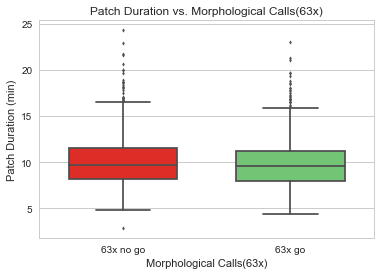

In [24]:
sns.boxplot(x = 'morphology', 
            y = 'patch_duration', 
            data = final_df[final_df['patch_duration'] > 1],
            order = ['63x no go','63x go'],
            palette = ['#de2d26', '#74c476'],
            width = 0.65,
            saturation = 1,
            fliersize = 3).set_title('Patch Duration vs. Morphological Calls(63x)')
plt.xlabel('Morphological Calls(63x)')
plt.ylabel('Patch Duration (min)')
#plt.savefig('TEXT')

### Box Plot of Patch Duration vs Post Patch Outcomes

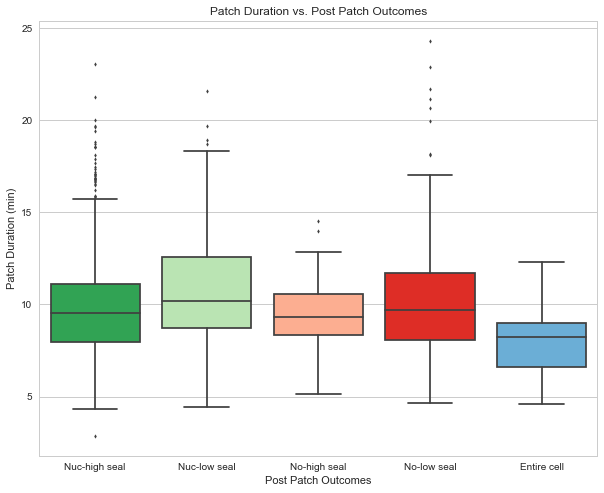

In [25]:
plt.subplots(figsize=(10,8)) #Has to before the plot to work

bp = sns.boxplot(x = 'post_patch', 
            y = 'patch_duration', 
            order = ['Nuc-high seal', 'Nuc-low seal', 'No-high seal', 'No-low seal','Entire cell'],
            palette = ['#31a354', '#bae4b3', '#fcae91', '#de2d26', '#6baed6'],
            data = final_df[final_df['patch_duration'] > 1],
            saturation = 1,
            fliersize = 3)

bp.set_title('Patch Duration vs. Post Patch Outcomes')
plt.xlabel('Post Patch Outcomes')
plt.ylabel('Patch Duration (min)')
plt.savefig('Boxplot_PD_vs_PP')

### Box Plot of Patch Duration vs Morphological Calls per Post Post Outcomes

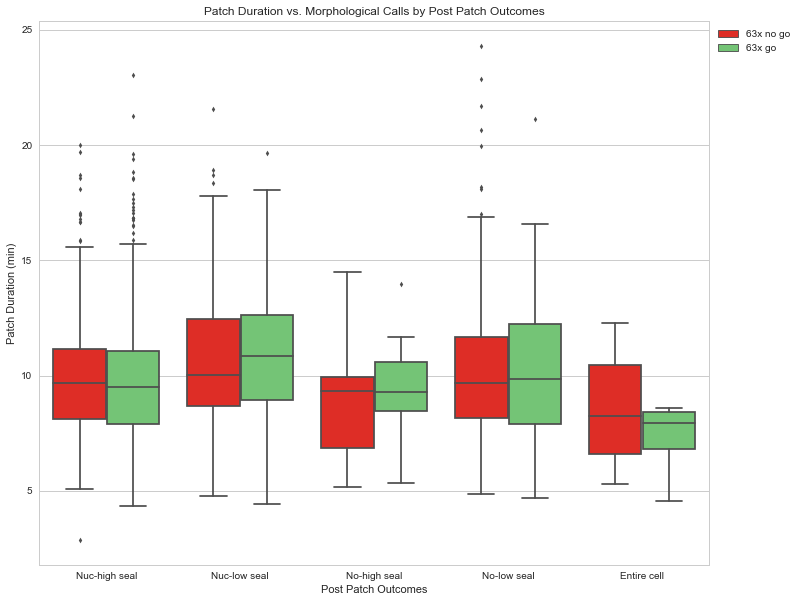

In [26]:
plt.subplots(figsize=(12,10)) #Has to before the plot to work

bp = sns.boxplot(x = 'post_patch', 
            y = 'patch_duration', 
            hue = 'morphology',
            order = ['Nuc-high seal', 'Nuc-low seal', 'No-high seal', 'No-low seal','Entire cell'],
            hue_order = ['63x no go','63x go'],
            data = final_df[final_df['patch_duration'] > 1],
            palette = ['#de2d26', '#74c476'],
            saturation = 1,
            fliersize = 4)

bp.legend(loc = 2, bbox_to_anchor = (1, 1))

bp.set_title('Patch Duration vs. Morphological Calls by Post Patch Outcomes')
plt.xlabel('Post Patch Outcomes')
plt.ylabel('Patch Duration (min)')
plt.savefig('Boxplot_PD_vs_M_by_PP')

##### Info

In [27]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 873 entries, 170901 to 180205
Data columns (total 7 columns):
morphology                873 non-null category
anno.postPatch_label      873 non-null object
anno.endPipetteR_label    873 non-null float64
patch_duration            873 non-null float64
extraction_duration       873 non-null float64
retraction_duration       707 non-null object
post_patch                873 non-null category
dtypes: category(2), float64(3), object(2)
memory usage: 42.9+ KB


##### Factor Plot of Patch Duration vs Morphological Calls per Post Post Outcomes

Text(0.5,1,u'Patch Duration vs. Morphological Calls by Post Patch Outcomes')

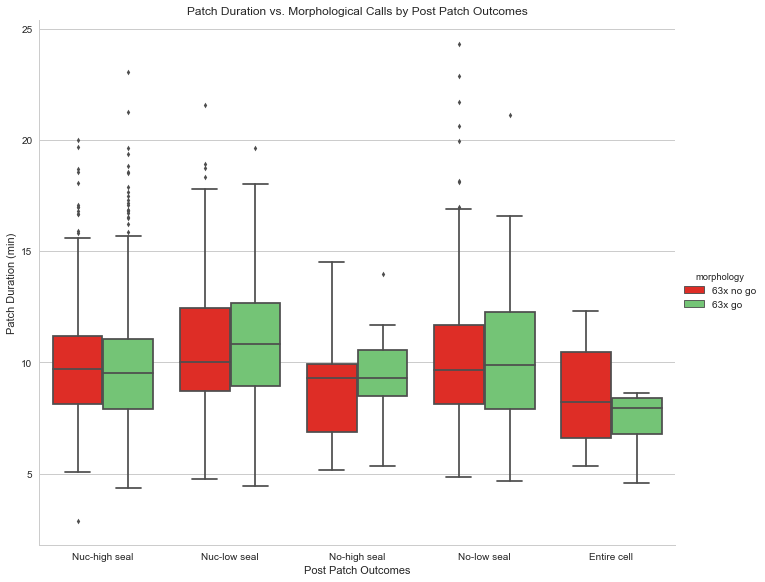

In [28]:
fp = sns.factorplot(
    kind = 'box',
    x = 'post_patch', 
    y = 'patch_duration', 
    hue = 'morphology',
    order = ['Nuc-high seal', 'Nuc-low seal', 'No-high seal', 'No-low seal','Entire cell'],
    hue_order = ['63x no go','63x go'],
    data = final_df[final_df['patch_duration'] > 1],
    palette = ['#de2d26', '#74c476'],
    saturation = 1,
    fliersize = 4,
    size = 8,
    aspect = 1.2,
    legend_out = True) 

fp.set(xlabel = 'Post Patch Outcomes', ylabel = 'Patch Duration (min)')
plt.title('Patch Duration vs. Morphological Calls by Post Patch Outcomes')

## Extra Plots

In [29]:
final_df = final_df.reset_index()

In [30]:
final_df.head()

,Date,morphology,anno.postPatch_label,anno.endPipetteR_label,patch_duration,extraction_duration,retraction_duration,post_patch
0,170901,63x go,Nucleated,0.0,9.966667,0.850000,NaN,Nuc-high seal
1,170901,63x no go,Nucleated,0.0,11.316667,1.700000,NaN,Nuc-high seal
2,170901,63x go,Nucleated,0.0,10.450000,1.300000,NaN,Nuc-high seal
3,170906,63x go,Nucleated,0.0,6.800000,2.116667,NaN,Nuc-high seal
4,170906,63x no go,Nucleated,0.0,6.200000,0.966667,NaN,Nuc-high seal


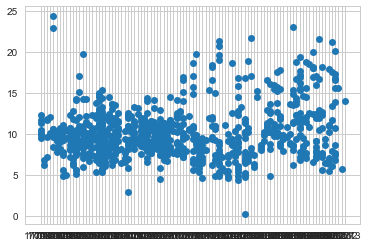

In [31]:
plt.plot_date(final_df['Date'], final_df['patch_duration'])

In [32]:
#Changing Date Format
final_df['Date'] = pd.to_datetime(final_df['Date'], format = "%y%m%d", errors = "coerce")

In [33]:
final_df.head()

,Date,morphology,anno.postPatch_label,anno.endPipetteR_label,patch_duration,extraction_duration,retraction_duration,post_patch
0,2017-09-01,63x go,Nucleated,0.0,9.966667,0.850000,NaN,Nuc-high seal
1,2017-09-01,63x no go,Nucleated,0.0,11.316667,1.700000,NaN,Nuc-high seal
2,2017-09-01,63x go,Nucleated,0.0,10.450000,1.300000,NaN,Nuc-high seal
3,2017-09-06,63x go,Nucleated,0.0,6.800000,2.116667,NaN,Nuc-high seal
4,2017-09-06,63x no go,Nucleated,0.0,6.200000,0.966667,NaN,Nuc-high seal


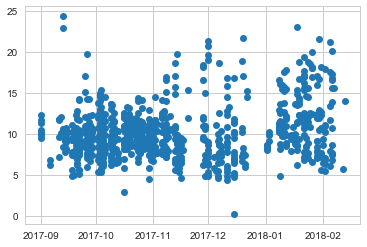

In [34]:
plt.plot_date(x = final_df['Date'], 
              y = final_df['patch_duration'])

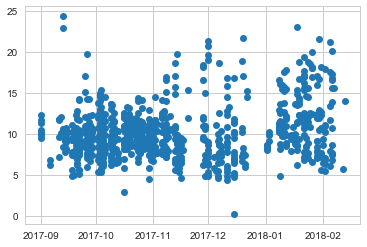

In [35]:
plt.plot_date(x = final_df['Date'], 
              y = final_df['patch_duration'])

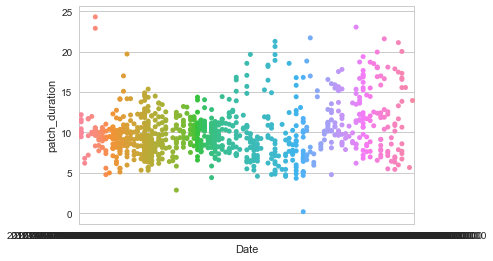

In [36]:
sns.stripplot(x = 'Date',
              y = 'patch_duration',
              data = final_df)